In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv('Datasets/housing_price_dataset.csv')
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [8]:
encoder = LabelEncoder()

In [9]:
encoder.fit(df.Neighborhood.drop_duplicates())

LabelEncoder()

In [10]:
df.Neighborhood = encoder.transform(df.Neighborhood)

In [11]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,0,1969,215355.283618
1,2459,3,2,0,1980,195014.221626
2,1860,2,1,1,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,1,2001,272436.239065


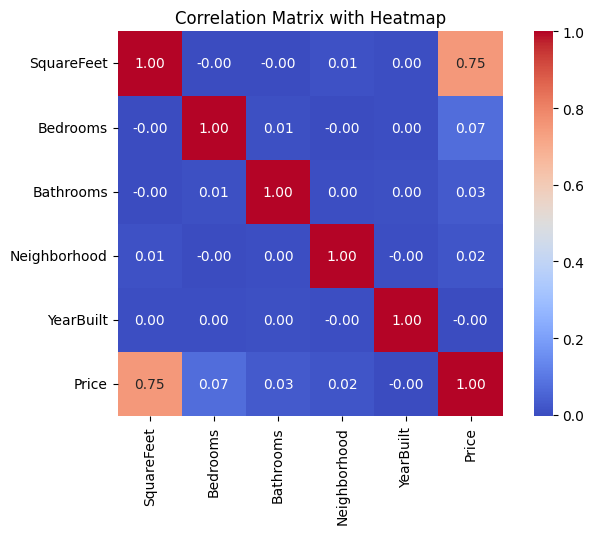

In [12]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix with Heatmap')

# Show plot
plt.show()

In [14]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
rf = RandomForestRegressor(n_estimators=1000)

In [30]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [31]:
y_pred = rf.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)

Mean Squared Error (MSE): 3167240262.5962095
R-squared: 0.45114360995455105
